<a href="https://colab.research.google.com/github/CoskunErden/CoskunErden/blob/main/statefarm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [ ]:
## import training data

exercise = pd.read_csv('/content/drive/MyDrive/Statefarm/exercise_40_train.csv')
exercise.shape


(40000, 101)

In [ ]:
## first glimpse at data

pd.set_option('display.max_columns', None)
exercise.head()

Look into columns:
x3: categorical, days of the week; 
x7: remove percentage sign, numerical; 
x19: remove $ and - , numerical; 
x24: categorical, sex; 
x30: too many missing values; 
x31: binary, yes, no; 
x33: categorical, states; 
x39: categorical, 5-10 miles, etc.; 
x59: numerical, only 0 (might be binary); 
x60: categorical, months; 
x65: categorical, company;
x77: categorical, make of car;
x93: binary, yes and no;
x98: binary, 1 and 0;
x99: binary, yes and no




In [ ]:
## import test data

df_test = pd.read_csv('/content/drive/MyDrive/Statefarm/exercise_40_test.csv')
df_test.shape

(10000, 100)

In [ ]:
## first glimpse at test data

df_test.head()

The exercise_40_test.csv file does not include the dependent variable y. So, I will work on the exercise_40_train.csv file and split it into train and test sets by using test_size = 0.25 to have 30000 observations in the train set and 10000 observations in the test set.

In [ ]:
## copying the dataset to a new one

df = exercise.copy(deep = True)  

In [ ]:
## examining datatypes and missing values

print(df.info(verbose = True, show_counts =True))

Look into columns: x3: categorical, days of the week; **x7: remove percentage sign, numerical; x19: remove $ and - , numerical**; x24: categorical, sex; x30: too many missing values; **x31: binary**, yes, no; x33: categorical, states; x39: categorical, 5-10 miles, etc.; x59: numerical, only 0 (might be binary); x60: categorical, months; x65: categorical, company; x77: categorical, make of car; x93: binary, yes and no; x98: binary, 1 and 0; x99: binary, yes and no


In [ ]:
## dropping columns with more than 10000 (%25) missing values

# list showing the number of missing values in each column
mis_list = list(df.isna().sum())

# creating a list of columns with more than 10000 missing values
mis_arr = np.array(mis_list)
mis_10000_bool = mis_arr >  10000
clmns = df.columns
mis_10000 = list(clmns[mis_10000_bool])
print(mis_10000)


df = df.drop(mis_10000, axis =1)
print(df.shape)


['x16', 'x30', 'x44', 'x49', 'x52', 'x54', 'x55', 'x57', 'x74', 'x78', 'x89', 'x95', 'x99']
(40000, 88)


In [ ]:
## stripping data 

# stripping % from x7
df['x7'] = (df.loc[:, 'x7']).str.strip('%')

# stripping $ and - signs from x19
df['x19'] = (df.loc[:, 'x19']).str.strip('$-')



In [ ]:
## examining the values in categorical columns

# function for printing unique values in a list of columns

def prnt(columns):
  for c in columns:
     print(df[c].unique())

columns = ['x3', 'x24', 'x31', 'x33', 'x39', 'x59', 'x60', 'x65', 'x93', 'x98']

prnt(columns)



In [ ]:
# replacing short versions of days with full versions in x3 (i.e. Mon to Monday)
mapping = {'Mon':'Monday', 'Tue':'Tuesday', 'Wed':'Wednesday',
'Thur':'Thursday', 'Fri':'Friday', 'Sat':'Saturday', 'Sun':'Sunday'}

df['x3'] = df['x3'].replace(mapping)

# dropping the column x39 as it contains single value (i.e. no variation)
df = df.drop('x39', axis = 1)

In [ ]:
## changing datatypes

# function changing datatype of a column
def change_datatype(column_datatypes):
  for c in column_datatypes:
      df[c] = df[c].astype(column_datatypes[c])

columns_datatypes = {'x3': 'category', 'x7':'float64', 'x19':'float64', 
                     'x24':'category', 'x31':'category', 'x33':'category',
                     'x60':'category', 'x65': 'category', 'x77':'category',
                      'x93': 'category', 'x98': 'category'}

change_datatype(columns_datatypes)



In [ ]:
## Examining numerical columns
df_cat_columns = df.select_dtypes(include=['category']).columns
df_cat = df[df_cat_columns]

df_num = df.iloc[:,1:].drop(df_cat_columns, axis = 1)

df_num.describe()


In [ ]:
# correlation among features
srt = (df_num.corr().to_numpy())
corr_coef = sorted(set(srt.flatten()))
corr_coef.remove(1)
print(min(corr_coef), max(corr_coef))
#print(set(srt.flatten))
#print(srt.item(0))

-0.7555635247765241 0.6864962475686026


In [ ]:
# forming the features and the labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
# checking whether the data is balanced or not
y.value_counts()

Imbalanced  data. 

In [ ]:
## splitting features dataset into two (categorical and numerical) according to datatypes
cat_columns = X.select_dtypes(include=['category']).columns
X_cat = X.loc[:,cat_columns]

X_num = X.drop(cat_columns, axis =1)
num_columns = X_num.columns


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data by using starified sampling
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, stratify = y, random_state =123)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, stratify = y, random_state =123)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
## Imputation

# imputing categorical variables with the most frquent one (although not a good strategy without content knowledge)
imp_cat = SimpleImputer(strategy = "most_frequent")
X_train_cat_imp = imp_cat.fit_transform(X_train_cat)
X_train_cat = pd.DataFrame(X_train_cat_imp, columns = cat_columns)

X_test_cat_imp = imp_cat.transform(X_test_cat)
X_test_cat =  pd.DataFrame(X_test_cat_imp, columns = cat_columns)


# imputing numerical variables with the mean
imp_num = SimpleImputer()
X_train_num = pd.DataFrame(imp_num.fit_transform(X_train_num), columns = num_columns)
X_test_num = pd.DataFrame(imp_num.fit_transform(X_test_num), columns = num_columns)


In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
## OneHotEncode and LabelEncoder at once

# create function to perform both OneHotEncoder and LabelEncoder
def dictvectorizer(dataframe):
  dataframe_dict = dataframe.to_dict("records")
  # Create the DictVectorizer object: dv
  dv = DictVectorizer(sparse = False)
  # Apply dv on df: df_encoded
  dataframe_encoded = dv.fit_transform(dataframe_dict)
  return dataframe_encoded

X_train_cat_encoded = pd.DataFrame(dictvectorizer(X_train_cat))

X_test_cat_encoded = pd.DataFrame(dictvectorizer(X_test_cat))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling the numerical data 
scaler = StandardScaler()
X_train_num = pd.DataFrame(X_train_num)
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns = num_columns)


X_test_num = pd.DataFrame(X_test_num)
X_test_num = pd.DataFrame(scaler.fit_transform(X_test_num), columns = num_columns)


In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [ ]:
#PCA with 90% 

pca = PCA(n_components = 0.90)
X_train_num = pca.fit_transform(X_train_num)
X_test_num = pca.fit_transform(X_test_num)
print(pca.explained_variance_ratio_.cumsum())


In [ ]:
# concatenate numeric and categorical columns
X_train = np.append(X_train_num, X_train_cat_encoded, axis=1)
X_test = np.append(X_test_num, X_test_cat_encoded, axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV


In [ ]:
## Examining various regularization strength

lr = LogisticRegression(solver='liblinear', penalty = 'l1', class_weight = 'balanced')

# GridSearchCV 
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10, 100,1000]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'C': 100}


[[5413 3136]
 [ 848  603]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      8549
           1       0.16      0.42      0.23      1451

    accuracy                           0.60     10000
   macro avg       0.51      0.52      0.48     10000
weighted avg       0.76      0.60      0.66     10000



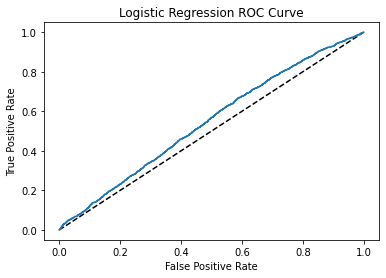

auc_score is: 0.5457903153499764


In [ ]:
#Logistic regression
logreg = LogisticRegression(solver='liblinear', penalty='l1', class_weight = 'balanced', C = 100, max_iter = 200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:,1] 


#confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

# roc_auc_score
print('auc_score is:', roc_auc_score(y_test, y_pred_probs))


# obtaining class probabilities for belonging to the positive class
logreg_probs = pd.DataFrame({ "probabilities":list(y_pred_probs)})
logreg_probs.to_csv("glmresults.csv",  index=False)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

[[8543    6]
 [1450    1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8549
           1       0.14      0.00      0.00      1451

    accuracy                           0.85     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.75      0.85      0.79     10000



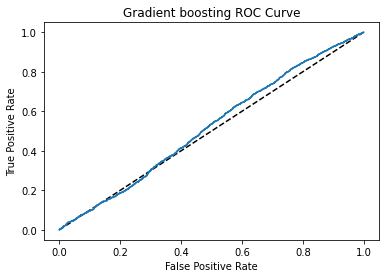

auc_score is: 0.5191474952152826


In [ ]:
 # Gradient Boosting machine

# Training XGBoost on the Training set
xg_cl = XGBClassifier(scale_pos_weight = 'ratio', objective='binary:logistic',
eval_metric = 'auc',n_estimators=100, seed=123)
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Confusion Matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient boosting ROC Curve')
plt.show()


# obtaining class probabilities for belonging to the positive class
y_pred_probs = classifier.predict_proba(X_test)[:,1]
xgboost_probs = pd.DataFrame({"probabilities":list(y_pred_probs)})
xgboost_probs.to_csv("nonglmresults.csv", index=False)

# roc_auc_score
print('auc_score is:', roc_auc_score(y_test, y_pred_probs))
